## A Place For Auto Encoder Scratch Work

In [5]:
import numpy as np
from src.mini_keras_ae import AE_0
from tensorflow.python.keras.datasets import mnist
from src.mini_keras_ae import *
import matplotlib.pyplot as plt

%autoreload 2

## If you would like to play with the commented out 
## autoencoder code below uncomment these imports

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Input, Dense, LeakyReLU
# from tensorflow.python.keras.layers import Conv2D, Conv2DTranspose

# Load Data:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and Reshape Data:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

def show_reconstruction(model, img_set=x_test, n=233, m=3):
    """
    Plot original and reconstructed images 
    for the n-th group of m images in the image set
    """
    for ii in range(n*m, n*m+m):
        img_ = img_set[ii]
        res_ = model.predict(np.array([img_]))
        f, (ax1, ax2) = plt.subplots(1,2)
        ax1.imshow(np.reshape(img_, (28,28)), cmap='gray')
        ax2.imshow(np.reshape(res_, (28,28)), cmap='gray')
        plt.show()

(60000, 784)
(10000, 784)


In [6]:
IMG_SHAPE = 28*28*1
BOTTLE_NECK = 10
BATCH_SIZE = 50
EPOCHS = 5

N = 233
M = 3

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/2
60000/60000 [==============================]60000/60000 [==============================] - 6s 101us/step - loss: 0.0393

Epoch 2/2
60000/60000 [==============================]60000/60000 [==============================] - 6s 94us/step - loss: 0.0330



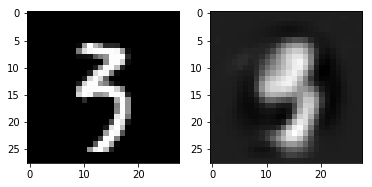

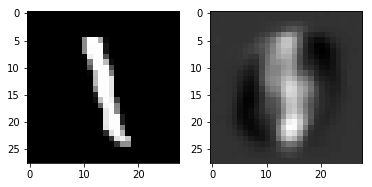

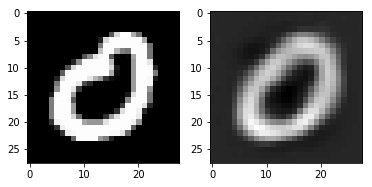

In [7]:
ae = AE_0().autoencoder
ae.fit(x_train, x_train, batch_size=100, epochs=2)
        
show_reconstruction(ae)

In [8]:
ae_dense = AE_dense_1().autoencoder
print(ae_dense.count_params())
ae_dense.fit(x_train, x_train, batch_size=50, epochs=5)

110394
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 170us/step - loss: 0.0393

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 117us/step - loss: 0.0329

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 119us/step - loss: 0.0325

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 6s 97us/step - loss: 0.0324

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 6s 95us/step - loss: 0.0323



In [30]:
x_train_c = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test_c = np.reshape(x_test, (len(x_test), 28, 28, 1))

ae_x = AE_x().autoencoder
print("num parameters: ", ae_x.count_params())
ae_x.fit(x_train_c, x_train_c, batch_size=50, epochs=5)

1012410
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 139s 2ms/step - loss: 0.0580

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 133s 2ms/step - loss: 0.0422

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 138s 2ms/step - loss: 0.0381

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 141s 2ms/step - loss: 0.0361

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 140s 2ms/step - loss: 0.0349



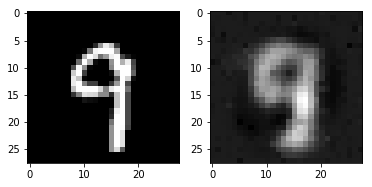

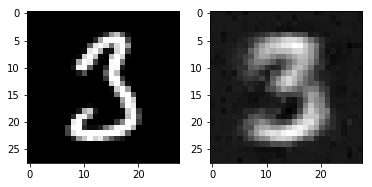

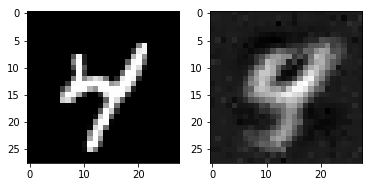

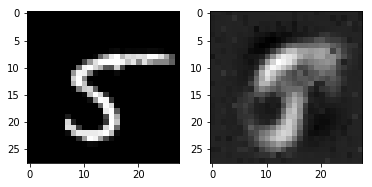

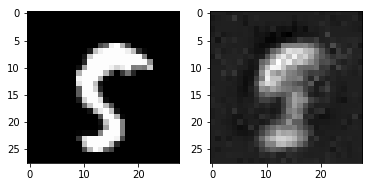

In [33]:
show_reconstruction(ae_x, x_test_c, 233, 5)

In [ ]:
n = 233
m = 5

for ii in range(n*m, n*m+m):
    img_ = x_test[ii]
    img_c = x_test_c[ii]
    res_c = ae_conv.predict(np.array([img_c]))
    res_d = ae_dense.predict(np.array([img_]))
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(np.reshape(img_, (28,28)), cmap='gray')
    ax2.imshow(np.reshape(res_d, (28,28)), cmap='gray')
    ax3.imshow(np.reshape(res_c, (28,28)), cmap='gray')
    plt.show()

## TODO:

- demo tensorboard
- demo decoder for new image generation
- demo encoder for image classification